In [1]:
import sys
sys.path.append('..')
from data_preprocessing import DataPreprocessing
from model_training import ModelTraining
import config

In [2]:
PROCESSED_DATA_PATH = config.DATA_FOLDER + config.PROCESSED_DATA_PATH

In [3]:
data = DataPreprocessing.load_data(PROCESSED_DATA_PATH)

2025-02-12 01:33:36,106 - INFO - Loading dataset from ../data/../data/processed_churn_data.csv


In [4]:
data.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
1,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
2,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
3,3120,1,32.0,R,5,3,111,5,0,227,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
4,41406,0,21.0,na,0,0,4,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0


In [5]:
mt = ModelTraining(PROCESSED_DATA_PATH,
                   logistic_regression_params=config.LOGISTIC_REGRESSION_PARAMS,
                   grid_search_params=config.GRID_SEARCH_PARAMS)

In [6]:
mt._split_data()

2025-02-12 01:33:36,281 - INFO - Performing feature engineering on the dataset


In [7]:
mt._balance_data()

In [8]:
mt._scale_features()

In [9]:
mt.build_model()

Test Data Accuracy: 0.6298


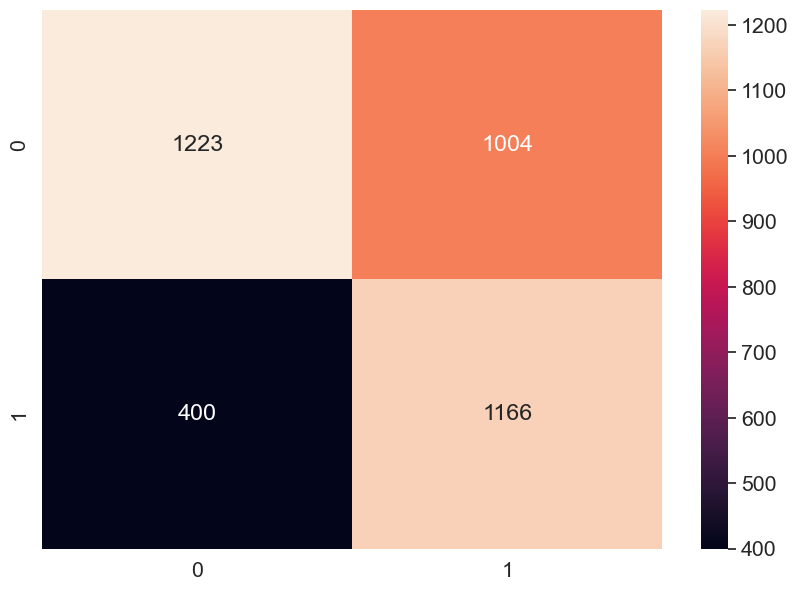

In [10]:
accuracy, precision, recall, f1 = mt.evaluate_model()

In [11]:
mt.cross_validate_model()

SVM Accuracy: 0.654 (+/- 0.034)


(0.6542955657681, 0.03387213416308271)

In [12]:
best_accuracy, best_parameters, best_score = mt.tune_model()

Took 13.44 seconds


In [13]:
best_accuracy, best_parameters, best_score

(0.6551769760245102, {'C': 0.1, 'penalty': 'l1'}, 0.6551769760245102)

In [15]:
final_results = mt.save_results()

In [16]:
final_results

,user,churn,predicted_churn
0,25745,0.0,0
1,46433,1.0,0
2,1376,0.0,0
3,15062,1.0,1
4,33076,1.0,0
...,...,...,...
3788,3555,1.0,1
3789,24158,0.0,0
3790,35673,0.0,0
3791,35778,0.0,0
